In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Plot inline
%matplotlib inline

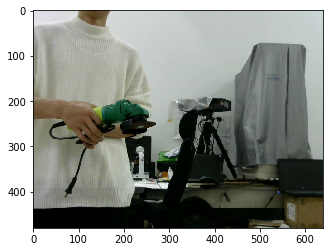

In [3]:
# read png image and convert the image to HSV
img = cv2.imread("tool15.jpg", cv2.IMREAD_COLOR)

img_plt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_plt)

True

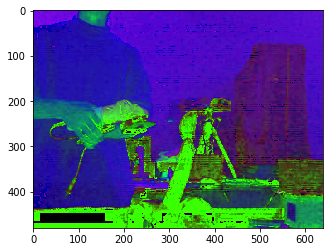

In [4]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  
plt.imshow(hsv, cmap="hsv")
cv2.imwrite("hsv.png", hsv)

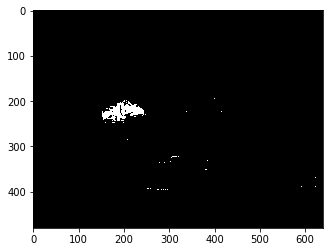

In [5]:
# find green objects in the image\
# 153 76 28 -> 77 194 71
lower_green = numpy.array([67, 154, 21], numpy.uint8)
upper_green = numpy.array([87, 244, 121], numpy.uint8)
mask = cv2.inRange(hsv, lower_green, upper_green)

cv2.imwrite("hsv_mask.png", mask)
plt.imshow(mask, cmap='gray')

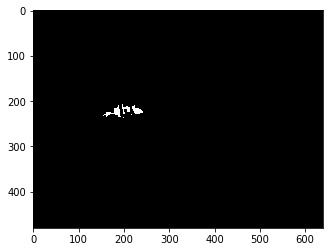

In [33]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(mask,kernel,iterations = 2)

plt.imshow(erosion, cmap='gray')

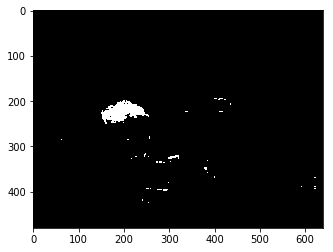

In [34]:
dilation = cv2.dilate(mask,kernel,iterations = 1)

plt.imshow(dilation, cmap='gray')

True

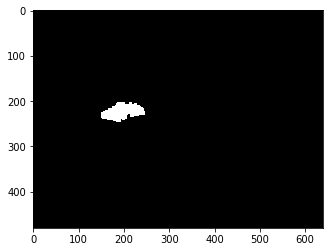

In [55]:
# erosion then dilation
kernel_e = np.ones((3,3),np.uint8)
kernel_d = np.ones((7,7),np.uint8)
erosion = cv2.erode(mask,kernel_e,iterations = 1)
ed = cv2.dilate(erosion,kernel_d,iterations = 1)

plt.imshow(ed, cmap='gray')
cv2.imwrite("erosion_dilation.png", ed)

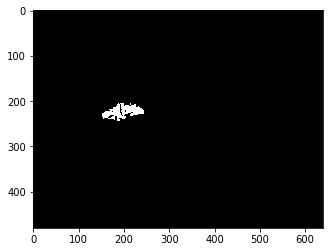

In [40]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap='gray')

In [56]:
im = cv2.imread("tool15.jpg", cv2.IMREAD_COLOR)
image, contours, hierarchy = cv2.findContours(ed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

True

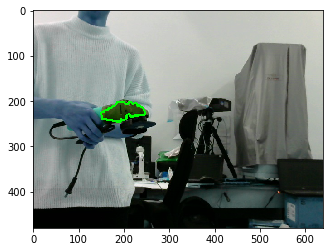

In [59]:
image = cv2.drawContours(im, contours, 0, (0,255,0), 3)

plt.imshow(image)
cv2.imwrite("contour.png", image)